# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_files = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")
mice_files.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
len(mice_files["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_rows = mice_files[mice_files.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicate_rows["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_number = mice_files[mice_files["Mouse ID"].isin(duplicate_mice)]
duplicate_number

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = mice_files.drop(duplicate_number.index)
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice["Mouse ID"].unique())


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summice = clean_mice.groupby("Drug Regimen")
meanmice = summice["Tumor Volume (mm3)"].mean()
medianmice = summice["Tumor Volume (mm3)"].median()
varmice = summice["Tumor Volume (mm3)"].var()
stdmice = summice["Tumor Volume (mm3)"].std()
semmice = summice["Tumor Volume (mm3)"].sem()
tumormice = pd.merge(meanmice, medianmice, on="Drug Regimen")
tumormice = pd.merge(tumormice, varmice, on="Drug Regimen")
tumormice.columns = ["Mean Tumor Volume" , "Median Tumor Volume", "Tumor Volume Variance"]
stdmice = stdmice.rename("Tumor Volume Std. Dev.")
tumormice = pd.merge(tumormice, stdmice, on="Drug Regimen")
semmice = semmice.rename("Tumor Volume Std. Err.")
tumormice = pd.merge(tumormice, semmice, on="Drug Regimen")
tumormice
              
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

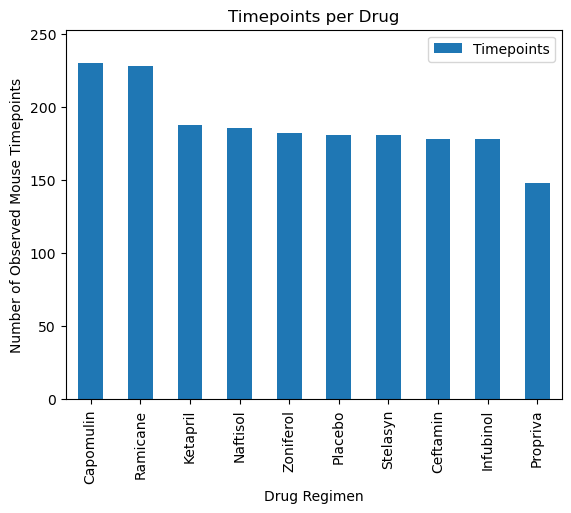

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
yaxis = summice["Drug Regimen"].value_counts()
xaxis = clean_mice["Drug Regimen"].unique()
#This section is from Xpert Assistant
pandata = pd.DataFrame({'Drug Regimen': yaxis.index, 'Timepoints': yaxis.values})
pandata = pandata.sort_values(by='Timepoints', ascending=False)
#Back to me
pandata.plot(kind='bar', x='Drug Regimen', y='Timepoints', title='Timepoints per Drug')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.ylim(0, max(yaxis)*1.10)
plt.xticks(rotation=90)
plt.show()


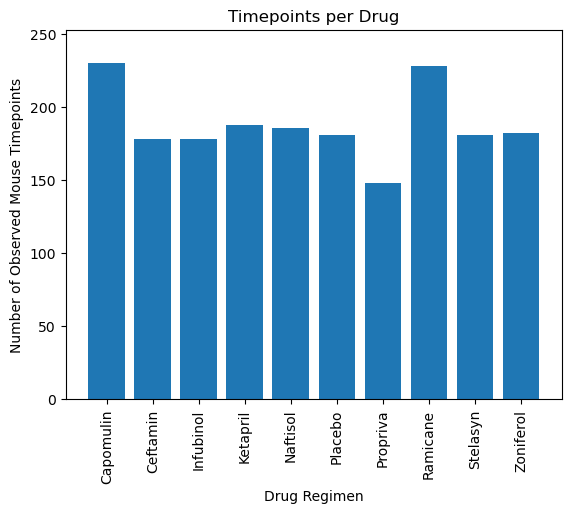

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
countmice = (summice["Drug Regimen"].value_counts())
drugmice = sorted(clean_mice["Drug Regimen"].unique())
plt.bar(drugmice, countmice)
plt.title("Timepoints per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.ylim(0, max(countmice)*1.10)
plt.xticks(rotation=90)
plt.show()

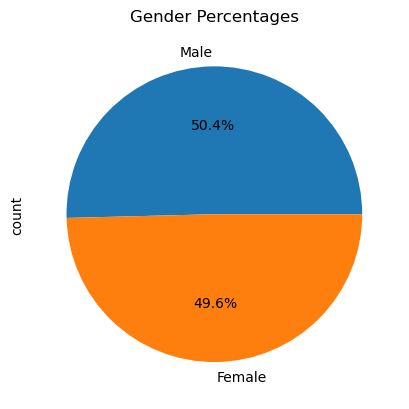

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
uniquemice = clean_mice.drop_duplicates(subset=["Mouse ID"])
sexmice = uniquemice["Sex"].value_counts()
sexmice.plot(kind='pie', autopct="%1.1f%%" , title="Gender Percentages")
plt.show()
# Make the pie chart


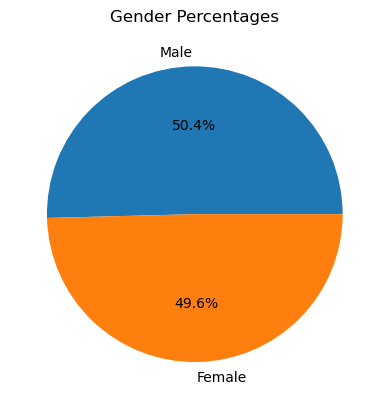

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
uniquemice = clean_mice.drop_duplicates(subset=["Mouse ID"])
sexmice = uniquemice["Sex"].value_counts()
labelmice = sexmice.index
amountmice = sexmice.values
plt.pie(amountmice, labels=labelmice, autopct="%1.1f%%")
plt.title("Gender Percentages")
plt.show()

# Make the pie chart


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugmice = clean_mice[clean_mice["Drug Regimen"].isin(drugs)]
drugmice = drugmice.sort_values(["Mouse ID","Timepoint"])
# Start by getting the last (greatest) timepoint for each mouse
endmice = drugmice.drop_duplicates(subset=["Mouse ID"], keep="last")
endmice = endmice.reset_index(drop=True)
endmice

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
###What would be the point of this?

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,45,68.594745,4
96,y793,Capomulin,Male,17,17,45,31.896238,2
97,y865,Ceftamin,Male,23,26,45,64.729837,3
98,z578,Ramicane,Male,11,16,45,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
#This whole section is from Xpert Assistant
treatmentmice = {}
for index, row in endmice.iterrows():
    treatment = row['Drug Regimen']
    tumorvolume = row['Tumor Volume (mm3)']
    if treatment in treatmentmice:
        treatmentmice[treatment].append(tumorvolume)
    else:
        treatmentmice[treatment] = [tumorvolume]

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Initialize a dictionary to store the results
outliers = {}

# Loop through each treatment group in the 'treatmentmice' dictionary
for treatment, tumor_volumes in treatmentmice.items():
    # Create a DataFrame for the current treatment
    data = pd.DataFrame({'Tumor Volume (mm3)': tumor_volumes})
    
    # Calculate the quartiles
    Q1 = data['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = data['Tumor Volume (mm3)'].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify potential outliers
    potential_outliers = data[(data['Tumor Volume (mm3)'] < lower_bound) | (data['Tumor Volume (mm3)'] > upper_bound)]
    
    # Store the potential outliers in the dictionary
    outliers[treatment] = potential_outliers

# Print the potential outliers for each treatment
for treatment, potential_outliers in outliers.items():
    if not potential_outliers.empty:
        print(f"Potential outliers for {treatment}:")
        print(potential_outliers)
    else:
        print(f"No potential outliers for {treatment}")



Potential outliers for Infubinol:
   Tumor Volume (mm3)
5           36.321346
No potential outliers for Ceftamin
No potential outliers for Ramicane
No potential outliers for Capomulin


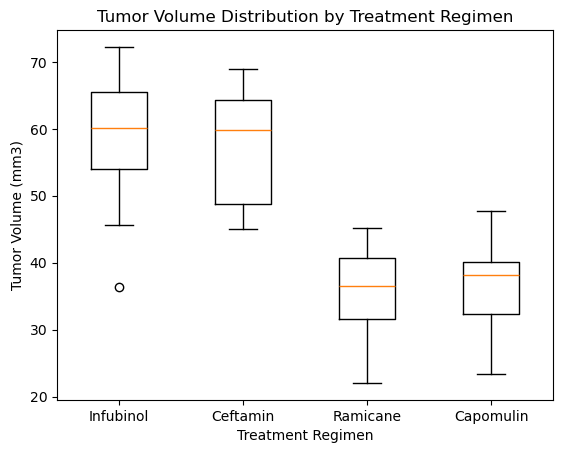

In [20]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatments = list(treatmentmice.keys())
tumorvolumes = list(treatmentmice.values())

# Create a box plot
plt.boxplot(tumorvolumes, labels=treatments)
plt.title('Tumor Volume Distribution by Treatment Regimen')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

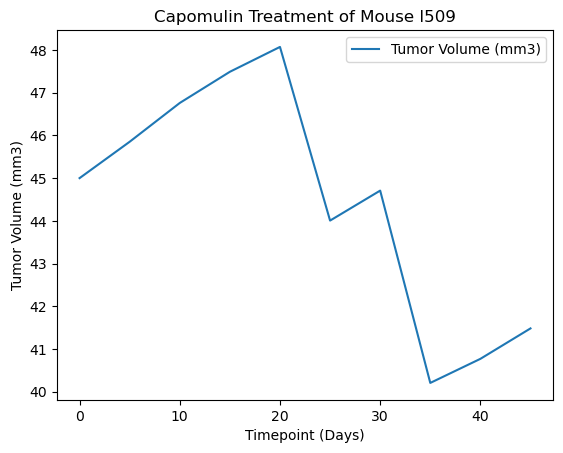

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = ["l509"]
imouse = clean_mice[clean_mice["Mouse ID"].isin(mouse)]
imouse = imouse[["Timepoint", "Tumor Volume (mm3)"]]
imouse = imouse.set_index("Timepoint")
imouse.plot(kind="line",title="Capomulin Treatment of Mouse l509", xlabel="Timepoint (Days)", ylabel="Tumor Volume (mm3)")
plt.show()

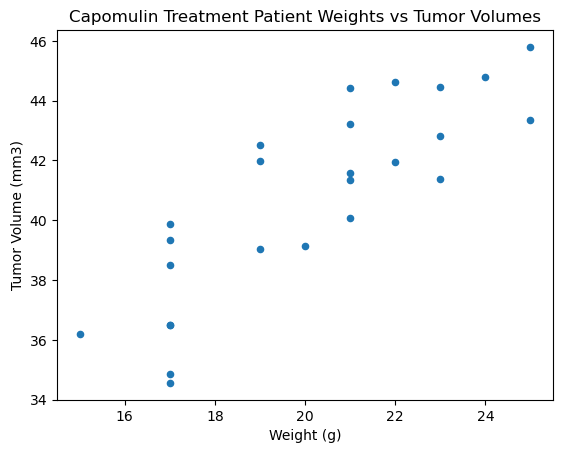

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
regimen = ["Capomulin"]
capregimen = clean_mice[clean_mice["Drug Regimen"].isin(regimen)]
capregimen = capregimen[["Mouse ID" , "Weight (g)","Tumor Volume (mm3)"]]
newcapregimen = capregimen.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
nnewcapregimen = capregimen.groupby("Mouse ID")["Weight (g)"].mean()
tumors = pd.merge(newcapregimen,nnewcapregimen, on="Mouse ID")
tumors.plot(kind="scatter",title="Capomulin Treatment Patient Weights vs Tumor Volumes", x="Weight (g)", y="Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between both weight and tumor volume is 0.84. 
The equation to determine the line is y = 0.74x + -10.15.


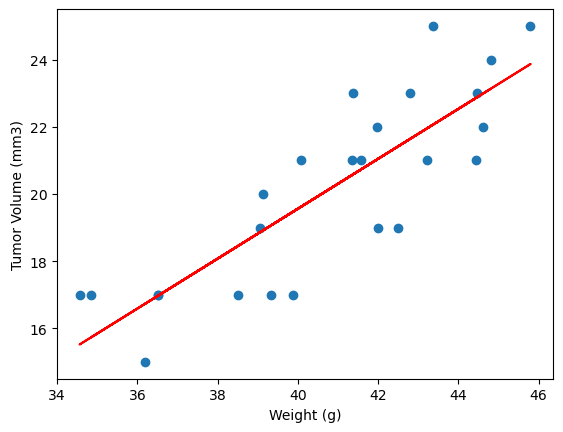

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
xaxis = tumors.iloc[:,0]
yaxis = tumors.iloc[:,1]
correlation = st.pearsonr(xaxis,yaxis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis,yaxis)
regress_values = (xaxis) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The correlation between both weight and tumor volume is {round(correlation[0],2)}. \nThe equation to determine the line is {line_eq}.")
plt.show()